## Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Make skeleton coordinators matrix

In [2]:
DATA_PATH = 'data/'
ACTION_SETS_PATH = 'actionsets/'
ACTION_SETS  = ['actionsets/ActionSet1.txt', 'actionsets/ActionSet2.txt', 'actionsets/ActionSet3.txt']
ACTION_NAMES = ['Wave','Hammer','Smash','Catch','Forward Punch','Throw','Draw X','Draw Tick','Draw ',
               'Circle','Clapping Hand','Two hand Wave','Side Boxing','Bend','Forward Kick','Side Kick','Jogging',
               'Tennis Swing','Tennis Serve','Golf Swing','Pickup&throw']

In [3]:
import os
TRAINING_SUBJECTS = ['s01','s03','s05','s07','s09']
TESTING_SUBJECTS = ['s02','s04','s06','s08','s10']
data_file_names = os.listdir(DATA_PATH)
print("Number of video files: ", len(data_file_names))

Number of video files:  570


In [4]:
train_data_file_names = [data_file_names[i] for i in range(len(data_file_names)) if data_file_names[i][4:7] in TRAINING_SUBJECTS]
test_data_file_names = [data_file_names[i] for i in range(len(data_file_names)) if data_file_names[i][4:7] in TESTING_SUBJECTS]

In [5]:
print("Number of training videos: ", len(train_data_file_names))
print("Number of testing videos: ", len(test_data_file_names))

Number of training videos:  292
Number of testing videos:  275


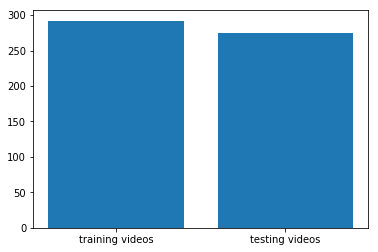

In [6]:
x_labels = ['training videos', 'testing videos']
y_labesl = [len(train_data_file_names), len(test_data_file_names)]
plt.bar(x_labels, y_labesl)
plt.show()

## Get most informative joints of each action

In [7]:
from MostJoints.getMostInformativeJoints import *
import setting

In [8]:
# TODO
from itertools import chain

def get_most_informative_joints(filenames):
    # Notice that filenames shoube be sorted before fitting into this method
    # For training phase
    noFramesList = []
    d1 = {'a0' + str(i) : [] for i in range(1,10)}
    d2 = {'a' + str(i) : [] for i in range(10, 21)}
    mostInformativeJointsList = dict(chain.from_iterable(d.items() for d in (d1,d2)))
    for i in range(len(filenames)):
        with open('data/' + filenames[i], 'r') as f:
            skeleton_i_th = [line.rstrip('\n') for line in f]
        for j in range(len(skeleton_i_th)):
            skeleton_i_th[j] = [float(coord) for coord in skeleton_i_th[j].split(' ')]
        skeleton_i_th = np.asarray(skeleton_i_th)
        noFrames = int(skeleton_i_th.shape[0]/setting.NUMBER_OF_JOINTS)
        x = skeleton_i_th[:,0]
        y = skeleton_i_th[:,1]
        z = skeleton_i_th[:,2]
        x = x.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_i_th.shape[0]/setting.NUMBER_OF_JOINTS))
        y = y.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_i_th.shape[0]/setting.NUMBER_OF_JOINTS))
        z = z.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_i_th.shape[0]/setting.NUMBER_OF_JOINTS))
        t = np.arange(1, noFrames+1)
        noFramesList.append(noFrames)
        listIdxMostJoints = getMostJoints(x.T,y.T,z.T,1,setting.NUMBER_OF_JOINTS)
        mostInformativeJointsList[filenames[i][0:3]].append(listIdxMostJoints)
    return noFramesList, mostInformativeJointsList
        

In [9]:
# sorted list of filenames 
train_data_file_names = sorted(train_data_file_names)
test_data_file_names = sorted(test_data_file_names)

In [10]:
train_noFrameList, train_mostInformativeJointsList = get_most_informative_joints(train_data_file_names)

## Create histograms to present apperance of joints for each action

In [11]:
# Let's make some plots with action 01
action_01 = train_mostInformativeJointsList['a01']

In [13]:
len(action_01)

[array([15, 18, 12, 14, 16, 17, 13, 11, 19,  5,  1,  8,  2,  9,  4,  6,  7,
         3,  0, 10]),
 array([12, 10, 13, 11,  9, 14, 16, 15, 19, 17, 18,  5,  6,  8,  7,  0,  4,
         2,  1,  3]),
 array([12, 13, 11, 16, 14, 17, 15, 18, 10, 19,  5,  6,  0,  7,  9,  4,  2,
         1,  3,  8]),
 array([15, 11, 14,  7, 10, 13,  8, 12,  9, 16,  3,  6, 19,  0,  4, 17,  5,
         2,  1, 18]),
 array([16,  7, 13, 10,  4, 15,  5,  8, 12,  6,  9, 14, 18, 11,  1, 19, 17,
         2,  3,  0]),
 array([ 7,  8,  6, 12,  9, 13, 11, 14, 10, 15,  5, 16,  4, 17,  3,  2, 18,
        19,  1,  0]),
 array([ 9, 15, 14, 12, 13, 10,  8, 11, 16,  7,  4,  6,  5, 17,  3, 18, 19,
         2,  0,  1]),
 array([15, 14, 12, 16,  9, 13, 10, 11,  8,  7, 17,  4,  6,  5,  3, 19, 18,
         2,  0,  1]),
 array([ 9,  8, 12,  7, 14, 13, 10, 11, 15,  6, 16,  4,  3, 17,  5, 19, 18,
         2,  0,  1]),
 array([ 9, 13,  7, 11, 15,  5, 10, 14,  6, 12,  8, 17, 19,  3,  1, 16,  4,
        18,  0,  2]),
 array([10, 15, 12, 

In [14]:
Ns_4 = [0 for i in range(20)]
Ns_8 = [0 for i in range(20)]
Ns_12 = [0 for i in range(20)]
for i in range(len(action_01)):
    for j in range(0, 12):
        if j < 4:
            Ns_4[action_01[i][j]-1] += 1
        if j < 8:
            Ns_8[action_01[i][j]-1] += 1
        if j < 12:
            Ns_12[action_01[i][j]-1] += 1
        

In [15]:
Ns_4

[0, 0, 0, 0, 0, 1, 7, 5, 4, 6, 5, 9, 6, 6, 6, 4, 0, 1, 0, 0]

In [16]:
Ns_8

[0, 0, 1, 1, 3, 4, 8, 10, 8, 12, 10, 13, 13, 13, 12, 7, 3, 2, 0, 0]

In [17]:
Ns_12

[2, 0, 3, 7, 9, 11, 11, 13, 12, 14, 13, 15, 15, 14, 15, 12, 7, 4, 3, 0]

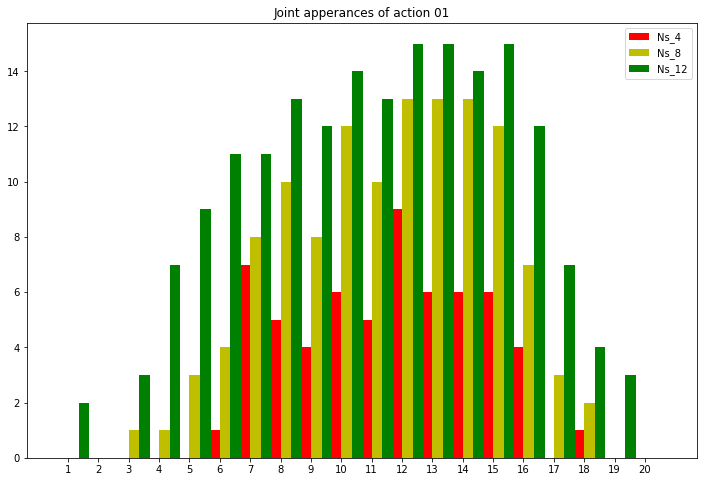

In [22]:
x_labels = [i for i in range(1,21)]
fig, ax = plt.subplots(figsize=(12,8))
ind = np.arange(20)
width = 0.35
p1 = ax.bar(ind, Ns_4, width, color='r')
p2 = ax.bar(ind+width, Ns_8, width, color='y')
p3 = ax.bar(ind+width*2, Ns_12, width, color='g')
ax.set_title('Joint apperances of action 01')
ax.set_xticks(ind+width/2)
ax.set_xticklabels(x_labels)
ax.legend((p1[0], p2[0], p3[0]), ('Ns_4', 'Ns_8', 'Ns_12'))
ax.autoscale_view()
plt.show()